# Import Libraries

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv', encoding='utf-8', sep=';')

print('Number of instances : ', df.shape[0])
print('Number of features : ', df.shape[1])

df.head()

Number of instances :  130443
Number of features :  17


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [4]:
df.shape

(130443, 17)

In [5]:
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']

In [6]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,130440.0,9.816763e+04,2.492198e+03,1.730000e+03,9.805200e+04,9.812100e+04,9.837000e+04,9.970100e+04
Model Year,130443.0,2.019555e+03,2.989137e+00,1.997000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,130443.0,7.670572e+01,9.942157e+01,0.000000e+00,0.000000e+00,2.300000e+01,1.510000e+02,3.370000e+02
Base MSRP,130443.0,1.495677e+03,9.844748e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,130138.0,2.957703e+01,1.476751e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,130443.0,2.051796e+08,8.710573e+07,4.385000e+03,1.568004e+08,2.034934e+08,2.290791e+08,4.792548e+08
2020 Census Tract,130440.0,5.297177e+10,1.640658e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [7]:
df[category].describe().T

,count,unique,top,freq
VIN (1-10),130443,8827,5YJYGDEE0M,467
County,130440,166,King,68477
City,130440,656,Seattle,22894
State,130443,46,WA,130138
Make,130443,35,TESLA,59629
Model,130221,121,MODEL 3,25311
Electric Vehicle Type,130443,2,Battery Electric Vehicle (BEV),100156
Clean Alternative Fuel Vehicle (CAFV) Eligibility,130443,3,Clean Alternative Fuel Vehicle Eligible,60551
Vehicle Location,130410,773,POINT (-122.13158 47.67858),3384
Electric Utility,130440,75,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),47490


# Data Preparation

## Preprocessing

In [8]:
# df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District',
#          'DOL Vehicle ID','Electric Utility','2020 Census Tract'], axis=1, inplace=True)

# df.drop(['VIN (1-10)', 'DOL Vehicle ID','2020 Census Tract'], axis=1, inplace=True)

### Duplicate Value

In [9]:
df.duplicated().sum()

0

### Missing Value

In [10]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [11]:
df.columns[df.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Model', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

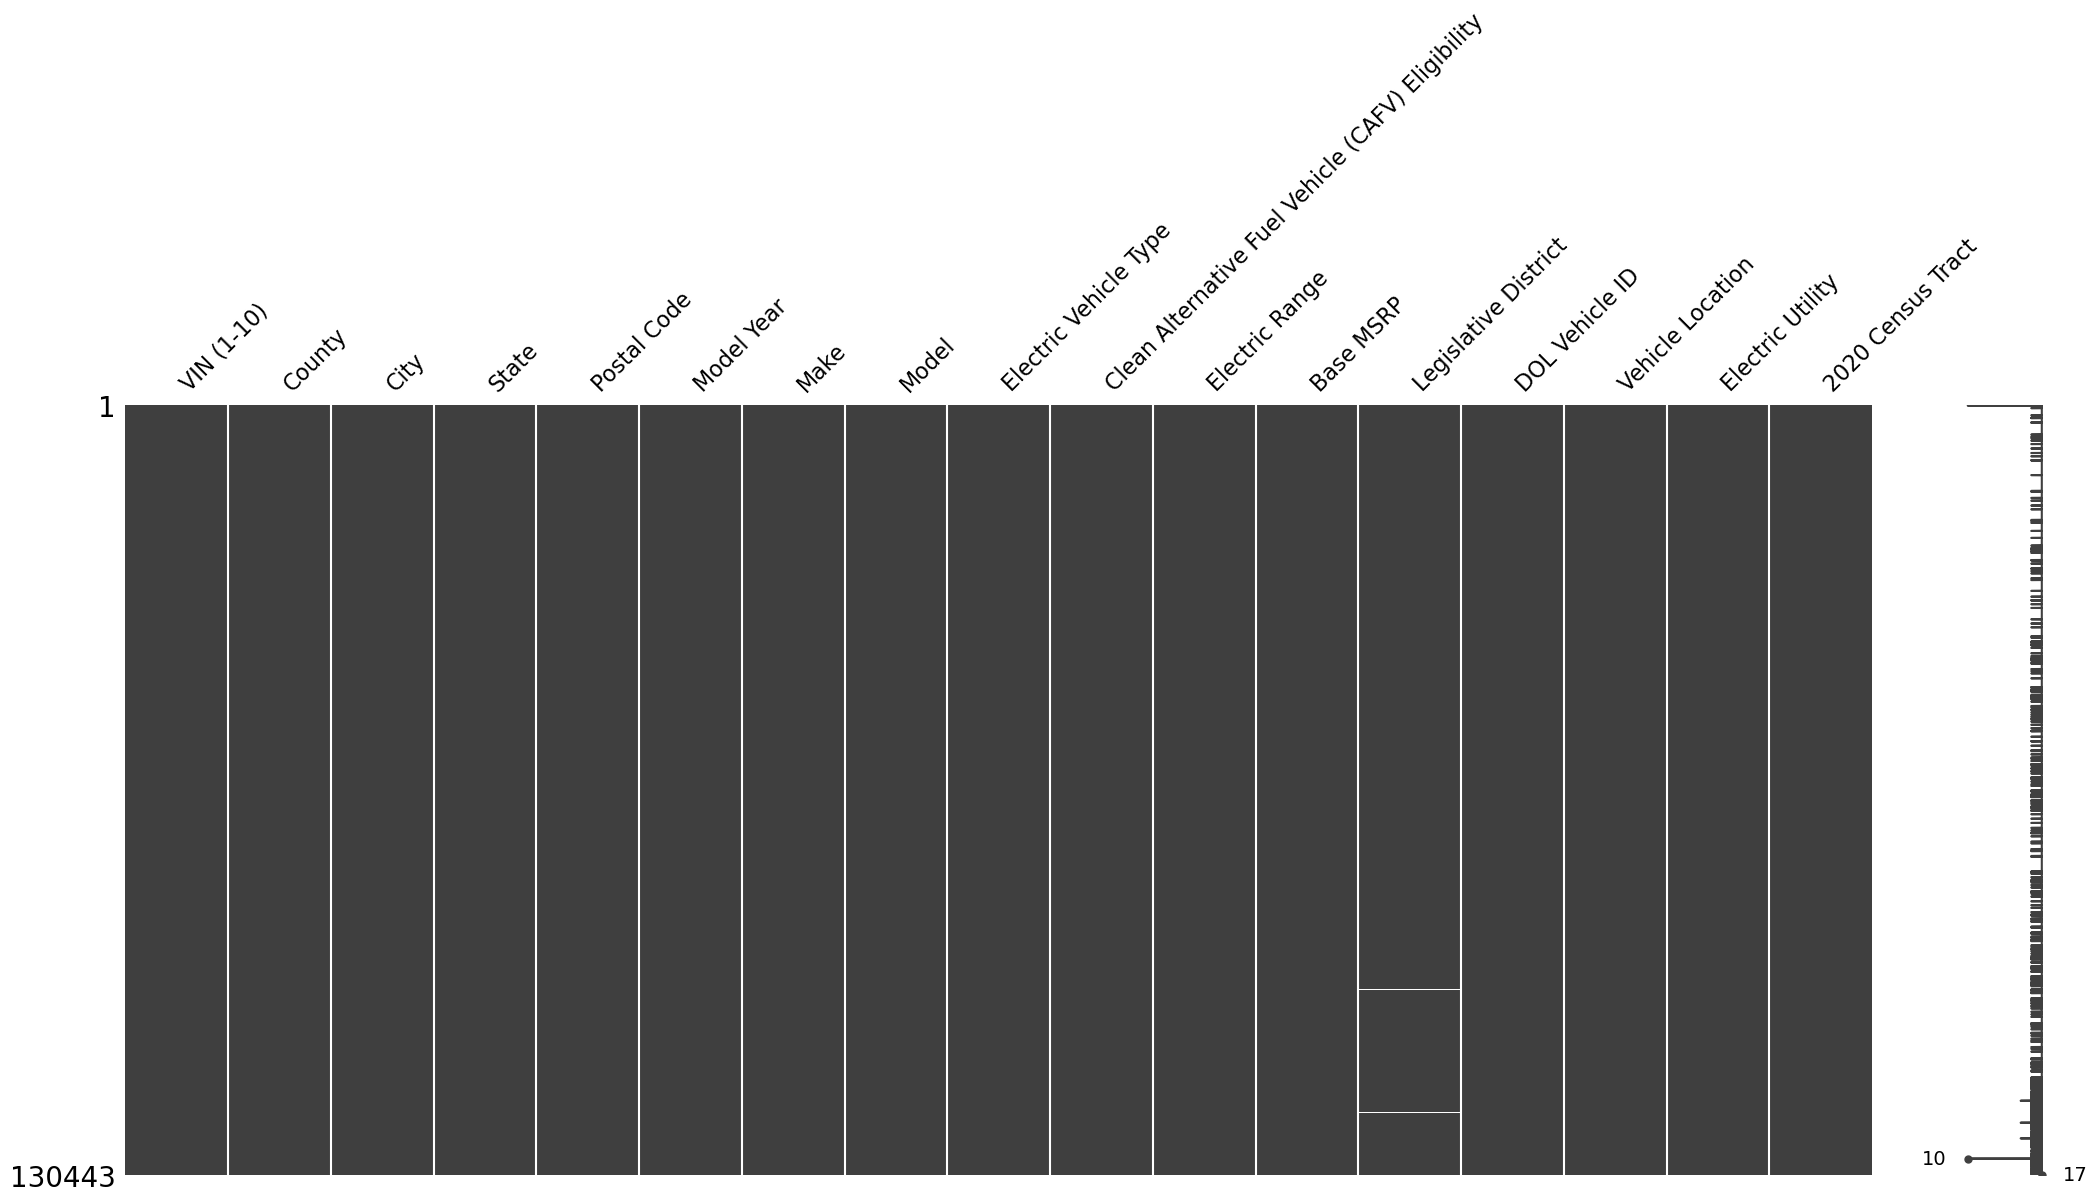

In [12]:
msno.matrix(df)
plt.show()

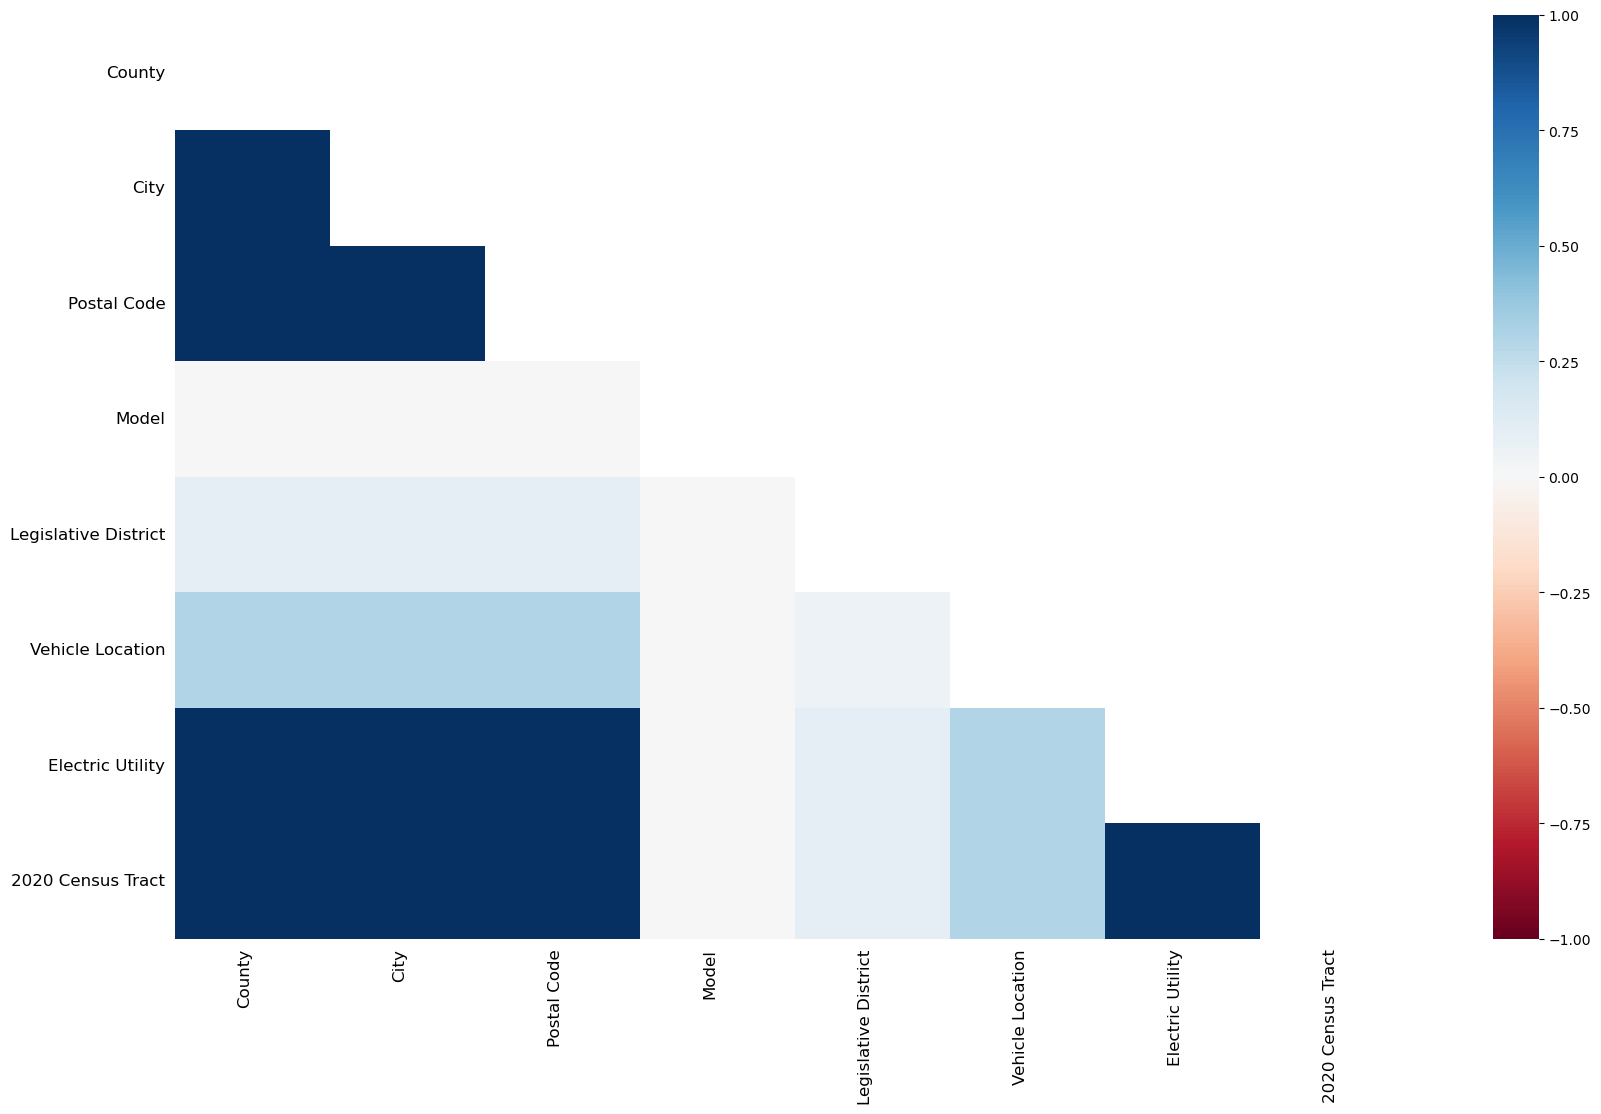

In [13]:
# ambil fitur yang memiliki missing value
missing_data = df.columns[df.isnull().any()]

# plotting heatmap missing value
g = msno.heatmap(df[missing_data], fontsize=12, labels=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

Berdasarkan heatmap di atas diketahui bahwa ternyata County dan City memiliki korelasi dalam konteks missing value. Jika salah satu kolom terdapat missing value, maka kolom lain tentu akan ada missing value juga.

#### Drop Sampel

In [14]:
df.dropna(subset=['County', 'City'], inplace=True)

df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 302
DOL Vehicle ID                                         0
Vehicle Location                                      30
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

#### Imputasi

In [15]:
def impute_numeric_data(data, columns, mode):
    for col in columns:
        if mode == 'median':
            value = data[col].median()
        elif mode == 'mean':
            value = data[col].mean()
        data[col].fillna(value, inplace=True)

def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)
        
impute_numeric_data(df, ['Legislative District'], 'median')
impute_categoric_data(df, ['Model', 'Vehicle Location'])

df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [16]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


### Feature Engineering

In [17]:
# extract longitude dan latitude
def extract_coordinates(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')', '')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)

df[['Longitude', 'Latitude']] = df['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
df = df.drop('Vehicle Location', axis=1)

# mapping fitur state
def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    
    return state_mapping.get(state_code, 'Unknown')

df['State'] = df['State'].apply(state_mapping)

def extract_substring(data, column_name):
    data[column_name] = data[column_name].str.split('-|\\|').str[0].str.strip()

extract_substring(df, 'Electric Utility')

In [18]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJXCAE26J,Yakima,Yakima,Washington,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,PACIFICORP,5.307700e+10,-120.56916,46.58514
1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
2,5YJ3E1EB0K,King,Seattle,Washington,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,CITY OF SEATTLE,5.303301e+10,-122.40092,47.65908
3,1N4AZ0CP5D,King,Seattle,Washington,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,CITY OF SEATTLE,5.303301e+10,-122.36840,47.64586
4,5YJSA1E21H,Thurston,Lacey,Washington,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,PUGET SOUND ENERGY INC,5.306701e+10,-122.75379,47.06316


### Encoding

In [19]:
category = [i for i in df.columns if df[i].dtype == 'object']

for col in category:
  print(df[col].value_counts())
  print()

5YJYGDEE0M    467
5YJYGDEE9M    462
5YJYGDEE7M    453
5YJYGDEE8M    447
5YJYGDEE2M    440
             ... 
WP0AC2Y15N      1
50EA1DCA4N      1
WBY2Z4C55K      1
1V2VMPE87P      1
WBA13AG06M      1
Name: VIN (1-10), Length: 8826, dtype: int64

King                    68477
Snohomish               14651
Pierce                  10019
Clark                    7700
Thurston                 4694
                        ...  
Wayne                       1
Marin                       1
Dorchester                  1
Sarpy                       1
Fairbanks North Star        1
Name: County, Length: 166, dtype: int64

Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: City, Length: 656, dtype: int64

Washington        130138
California            83
Virginia              35
Maryland              29
Texas          

In [20]:
df[category].columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

In [21]:
# import library untuk OHE dan Ordinal Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# inisialiasi prosedur untuk encode fitur kategori dengan 3 metode, One-Hot Encoding, Ordinal Encoding
def encode_data(data, columns, method):
    encoded_data = data.copy()

    # OHE encoding
    if method == 'OHE':
        ohe = OneHotEncoder(sparse=False, drop='first')
        encoded_columns = pd.DataFrame(ohe.fit_transform(data[columns]))
        encoded_columns.columns = ohe.get_feature_names_out(columns)

    # ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = pd.DataFrame(ordinal_enc.fit_transform(data[columns]), columns=columns)

    # frequency encoding
    elif method == 'frequency':
        encoded_columns = pd.DataFrame()
        for column in columns:
            freq_encoding = data[column].value_counts(normalize=True).to_dict()
            encoded_columns[column] = data[column].map(freq_encoding)

    # hapus fitur dan concat data
    encoded_data.drop(columns=columns, inplace=True)
    encoded_data = pd.concat([encoded_data, encoded_columns], axis=1)

    return encoded_data

In [22]:
ordinal_columns = ['State', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
frequency_columns = ['VIN (1-10)', 'County', 'City', 'Model', 'Electric Utility']

train = encode_data(df, ordinal_columns, method='ordinal')
train = encode_data(train, frequency_columns, method='frequency')
train.dropna(inplace=True)

In [23]:
train.isnull().sum()

Postal Code                                          0
Model Year                                           0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
2020 Census Tract                                    0
Longitude                                            0
Latitude                                             0
State                                                0
Make                                                 0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
VIN (1-10)                                           0
County                                               0
City                                                 0
Model                                                0
Electric Utility                                     0
dtype: int

In [24]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Electric Utility                                     0
2020 Census Tract                                    0
Longitude                                            0
Latitude                                             0
dtype: int

In [25]:
train.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude,State,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,VIN (1-10),County,City,Model,Electric Utility
0,98908.0,2018.0,238.0,0.0,14.0,141151601.0,5.307700e+10,-120.56916,46.58514,41.0,29.0,0.0,0.0,0.000192,0.005435,0.003611,0.036737,0.007421
1,98370.0,2021.0,47.0,0.0,23.0,171566447.0,5.303509e+10,-122.64681,47.73689,41.0,11.0,1.0,0.0,0.000008,0.033303,0.003994,0.005995,0.584054
2,98199.0,2019.0,220.0,0.0,36.0,9426525.0,5.303301e+10,-122.40092,47.65908,41.0,29.0,0.0,0.0,0.001694,0.524969,0.175514,0.195738,0.185802
3,98119.0,2013.0,75.0,0.0,36.0,211807760.0,5.303301e+10,-122.36840,47.64586,41.0,23.0,0.0,0.0,0.001319,0.524969,0.175514,0.099356,0.185802
4,98516.0,2017.0,210.0,0.0,22.0,185810306.0,5.306701e+10,-122.75379,47.06316,41.0,29.0,0.0,0.0,0.000475,0.035986,0.005029,0.056723,0.584054


In [26]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJXCAE26J,Yakima,Yakima,Washington,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,PACIFICORP,5.307700e+10,-120.56916,46.58514
1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
2,5YJ3E1EB0K,King,Seattle,Washington,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,CITY OF SEATTLE,5.303301e+10,-122.40092,47.65908
3,1N4AZ0CP5D,King,Seattle,Washington,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,CITY OF SEATTLE,5.303301e+10,-122.36840,47.64586
4,5YJSA1E21H,Thurston,Lacey,Washington,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,PUGET SOUND ENERGY INC,5.306701e+10,-122.75379,47.06316


In [27]:
train.shape

(130437, 18)

In [28]:
df.shape

(130440, 18)

# Exploratory Data Analysis

In [29]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJXCAE26J,Yakima,Yakima,Washington,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,PACIFICORP,5.307700e+10,-120.56916,46.58514
1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
2,5YJ3E1EB0K,King,Seattle,Washington,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,CITY OF SEATTLE,5.303301e+10,-122.40092,47.65908
3,1N4AZ0CP5D,King,Seattle,Washington,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,CITY OF SEATTLE,5.303301e+10,-122.36840,47.64586
4,5YJSA1E21H,Thurston,Lacey,Washington,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,PUGET SOUND ENERGY INC,5.306701e+10,-122.75379,47.06316


## Univariate Analysis

In [30]:
"""
    Deskripsi Parameter:

    - data: data yang digunakan
    - column: variabel pengamatan
    - hue: variabel ketiga (pembeda kategori)
    - lable: label variabel pengamatan
    - max_sample: jumlah maksimal bar yang ingin ditampilkan
    - num_x_ticks: jumlah xticks yang ingin di-custom
    - x_ticks: list nama xticks yang ingin di-custom
    - width: lebar chart
    - height: tinggi chart
    - y_title: jarak antara title dengan judul
    - orient: orientasi plot (vertikal atau horizontal)
    - title: judul chart
"""

# fungsi countplot_univariate untuk plotting countplot univariate
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # percabangan parameter orient untuk plotting vertikal
    if orient == 'vertical':
        if max_sample == 0:
            g = sns.countplot(x=column, hue=hue, order=data[column].value_counts().index, \
                          data=data, palette='muted')
        else:
            g = sns.countplot(x=column, hue=hue, order=data[column].value_counts().nlargest(max_sample).index, \
                          data=data, palette='muted')
        g.set(xlabel=label, ylabel='Jumlah')

    # percabangan parameter orient untuk plotting horizontal
    elif orient == 'horizontal':
        if max_sample == 0:
            g = sns.countplot(y=column, hue=hue, order=data[column].value_counts().index, \
                          data=data, palette='muted')
        else:
            g = sns.countplot(y=column, hue=hue, order=data[column].value_counts().nlargest(max_sample).index, \
                          data=data, palette='muted')
        g.set(xlabel='Jumlah', ylabel=label)

    # ubah setting label
    plt.legend(title='Target', labels=['BEV', 'PHEV'], fontsize=11)

    # kondisi untuk pemilihan x_ticks
    if num_x_ticks == 0:
        pass
    else:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # ambil total
    total = len(data[column])

    # percabangan untuk annotate persentase chart vertikal
    if orient == 'vertical':
        for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 1000), \
                            ha='center', va='bottom', fontsize=12)
    # percabangan untuk annotate persentase chart horizontal
    elif orient == 'horizontal':
        for p in g.patches:
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 250, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()

In [31]:
# inisialisasi fungsi untuk mengubah nilai kategori yang sedikit menjadi 'others'
def change_to_others(data, column_name, percent):
    data = df.copy()
    value_counts = data[column_name].value_counts(normalize=True)
    low_frequency_values = value_counts[value_counts < percent].index.tolist()
    data.loc[data[column_name].isin(low_frequency_values), column_name] = "Others"
    
    return data

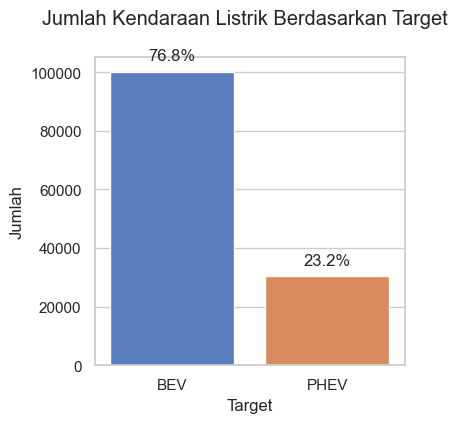

In [32]:
sns.set_theme(style="whitegrid")

chart = 'Jumlah Kendaraan Listrik Berdasarkan Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot untuk jumlah peminjam berdasarkan variabel target, kustomisasi xlabel, ylabel, dan xticks
g = sns.countplot(x='Electric Vehicle Type', data=df, palette='muted')
g.set(ylabel='Jumlah', xlabel='Target')
plt.xticks([0, 1], ['BEV', 'PHEV'], fontsize=11)

# annotate persentase chart
total = len(df['Electric Vehicle Type'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 3000), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

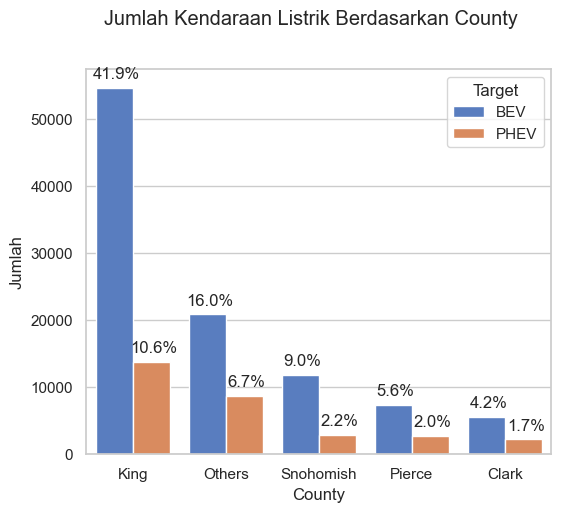

In [33]:
df2 = change_to_others(df, 'County', 0.05)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan County'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'County', 'Electric Vehicle Type', 'County', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

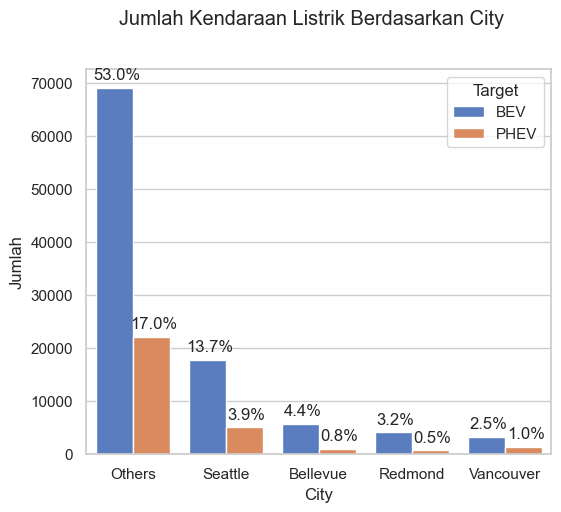

In [34]:
df2 = change_to_others(df, 'City', 0.035)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan City'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'City', 'Electric Vehicle Type', 'City', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

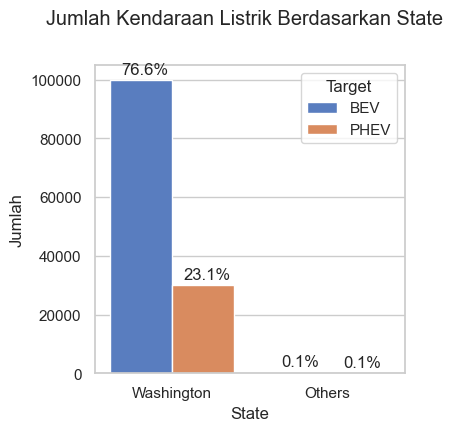

In [35]:
df2 = change_to_others(df, 'State', 0.01)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan State'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'State', 'Electric Vehicle Type', 'State', 0, 0, None, 4, 4, 1.02, \
                     'vertical', chart)

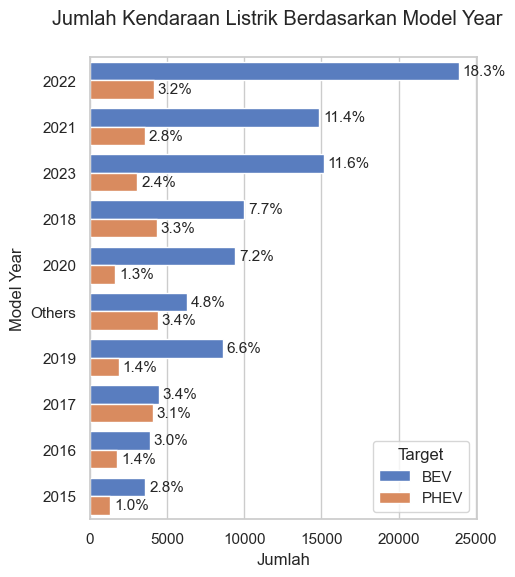

In [36]:
df2 = change_to_others(df, 'Model Year', 0.036)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan Model Year'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'Model Year', 'Electric Vehicle Type', 'Model Year', 0, 0, None, 5, 6, 0.96, \
                     'horizontal', chart)

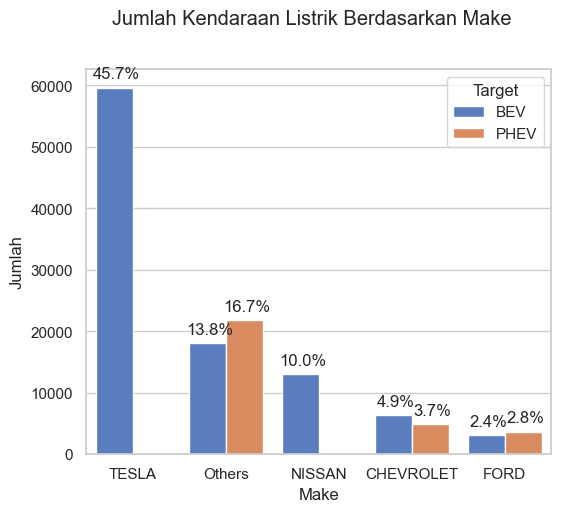

In [37]:
df2 = change_to_others(df, 'Make', 0.05)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan Make'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'Make', 'Electric Vehicle Type', 'Make', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

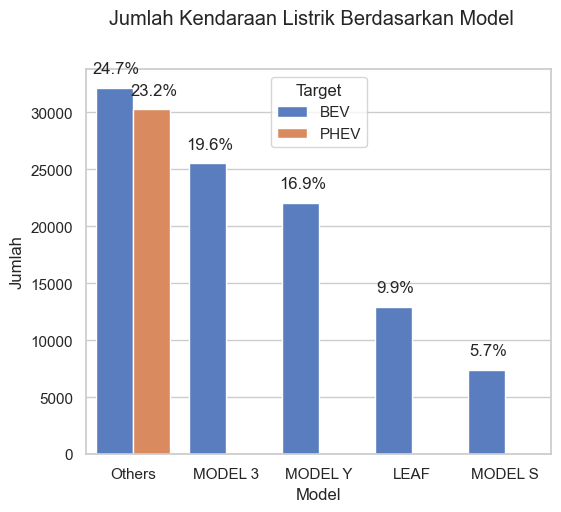

In [38]:
df2 = change_to_others(df, 'Model', 0.05)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan Model'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'Model', 'Electric Vehicle Type', 'Model', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

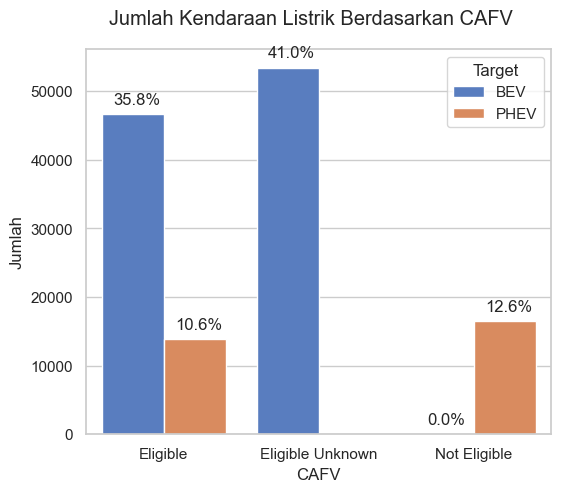

In [39]:
# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan CAFV'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Vehicle Type', 'CAFV', \
                     0, 3, ['Eligible', 'Eligible Unknown', 'Not Eligible'], 6, 5, 0.96, 'vertical', chart)

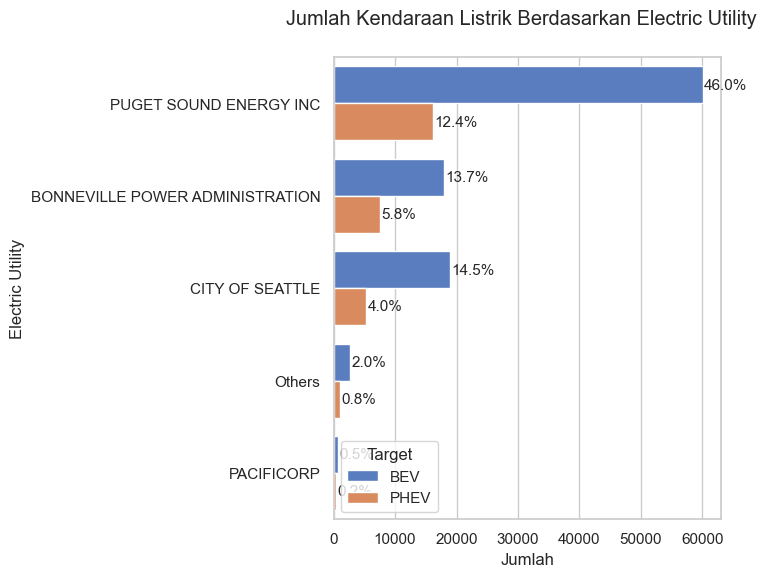

In [40]:
df2 = change_to_others(df, 'Electric Utility', 0.007)

# inisialisasi judul chart
chart = 'Jumlah Kendaraan Listrik Berdasarkan Electric Utility'

# apply prosedur untuk plotting chart
countplot_univariate(df2, 'Electric Utility', 'Electric Vehicle Type', 'Electric Utility', 0, 0, None, 5, 6, 0.96, \
                     'horizontal', chart)

## Bivariate Analysis 

In [41]:
# deskripsi parameter
"""
    Deskripsi Parameter:

    - data: data yang digunakan
    - x: fitur x
    - y: fitur y
    - hue: variabel ketiga (pembeda kategori)
    - label: label variabel pengamatan
    - label2: label kedua variabel pengamatan
    - width: lebar chart
    - height: tinggi chart
    - y_title: jarak antara title dengan judul
    - orient: orientasi plot (vertikal atau horizontal)
    - title: judul chart
"""

# fungsi untuk plotting boxplot bivariate
def boxplot_bivariate(data, x, y, hue, label, label2, width, height, y_title, orient, title):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # copy data untuk proses distribusi
    df_biv = data.copy()
    df_biv[hue] = df_biv[hue].apply(lambda x: 'BEV' if x == 'Battery Electric Vehicle (BEV)' else 'PHEV')
    df_biv[x] = df_biv[x].apply(lambda x: 'Eligible' if x == 'Clean Alternative Fuel Vehicle Eligible' \
        else ('Eligibility Unknown' if x == 'Eligibility unknown as battery range has not been researched' \
              else 'Not Eligible'))
#     df_biv.sort_values(by=hue, ascending=False, inplace=True)

    # percabangan parameter orient untuk plotting chart secara vertikal atau horizontal
    if orient == 'vertical':
        g = sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)
    elif orient == 'horizontal':
        g = sns.boxplot(x=y, y=x, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)

    plt.show()

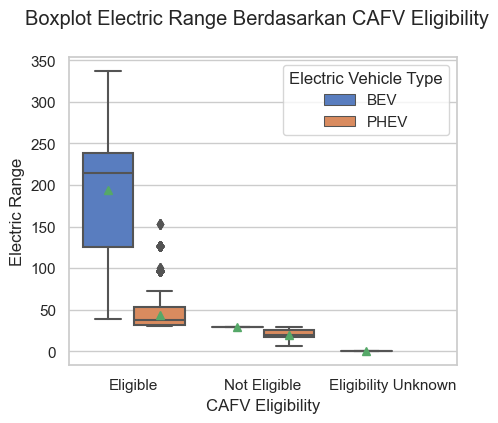

In [42]:
# inisialisasi judul chart
chart = 'Boxplot Electric Range Berdasarkan CAFV Eligibility'

# apply prosedur untuk plotting chart
boxplot_bivariate(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', \
                  'Electric Vehicle Type', 'Electric Range', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)


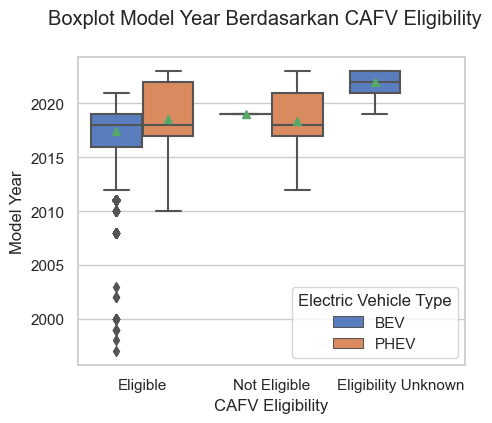

In [43]:
# inisialisasi judul chart
chart = 'Boxplot Model Year Berdasarkan CAFV Eligibility'

# apply prosedur untuk plotting chart
boxplot_bivariate(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Model Year', \
                  'Electric Vehicle Type', 'Model Year', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)

## Correlation

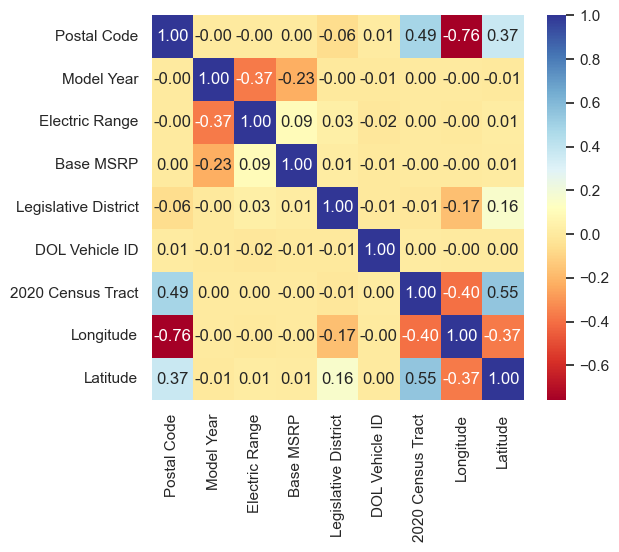

In [44]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 5))

# plotting heatmap korelasi antarfitur
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu', fmt='.2f')
plt.show()

In [45]:
# df['Electric Vehicle Type'].value_counts()

In [46]:
# df.to_csv('result.csv', index=False)

# Modeling

In [47]:
def plotting_cm(cm, chart):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # inisialisasi TP, TN, FN, dan FP serta persentasenya
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_initial = ['(TN)','(FP)','(FN)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plotting heatmap confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Predicted')
    g.set_ylabel('Actual')

    plt.show()

In [48]:
train['Electric Vehicle Type'] = train['Electric Vehicle Type'].astype(int)
train.shape

(130437, 18)

In [49]:
train.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude,State,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,VIN (1-10),County,City,Model,Electric Utility
0,98908.0,2018.0,238.0,0.0,14.0,141151601.0,5.307700e+10,-120.56916,46.58514,41.0,29.0,0,0.0,0.000192,0.005435,0.003611,0.036737,0.007421
1,98370.0,2021.0,47.0,0.0,23.0,171566447.0,5.303509e+10,-122.64681,47.73689,41.0,11.0,1,0.0,0.000008,0.033303,0.003994,0.005995,0.584054
2,98199.0,2019.0,220.0,0.0,36.0,9426525.0,5.303301e+10,-122.40092,47.65908,41.0,29.0,0,0.0,0.001694,0.524969,0.175514,0.195738,0.185802
3,98119.0,2013.0,75.0,0.0,36.0,211807760.0,5.303301e+10,-122.36840,47.64586,41.0,23.0,0,0.0,0.001319,0.524969,0.175514,0.099356,0.185802
4,98516.0,2017.0,210.0,0.0,22.0,185810306.0,5.306701e+10,-122.75379,47.06316,41.0,29.0,0,0.0,0.000475,0.035986,0.005029,0.056723,0.584054


In [50]:
train['Electric Vehicle Type'].value_counts()

0    100152
1     30285
Name: Electric Vehicle Type, dtype: int64

## Train Test Splitting

In [51]:
sns.set_theme(style="white")

# inisialisasi X sebagai fitur dan y sebagai target
X = train.drop('Electric Vehicle Type', axis=1).values
y = train['Electric Vehicle Type'].values

In [52]:
from sklearn.model_selection import train_test_split

# splitting data train dan test dengan jumlah test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [53]:
# inisialisasi list untuk menyimpan metrik evaluasi model
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_model = []
recall_model = []
f1_model = []
ROC_AUC_model = []

## Sampling

In [54]:
from imblearn.under_sampling import NearMiss
from collections import Counter

ns = NearMiss()

print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape':", Counter(y_train_resampled))

Original dataset shape: Counter({0: 70106, 1: 21199})
Resample dataset shape': Counter({0: 21199, 1: 21199})


## Naive Bayes

In [55]:
# import library model, metrik evaluasi, classification report, dan confusion matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix

# inisialisasi model dan fitting dengan data setelah sampling
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = NB_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.6860114484309516
ROC AUC Score: 0.5059268465731662
Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.84      0.80     30046
           1       0.25      0.17      0.20      9086

    accuracy                           0.69     39132
   macro avg       0.51      0.51      0.50     39132
weighted avg       0.65      0.69      0.66     39132

Confusion Matrix:

 [[25303  4743]
 [ 7544  1542]]


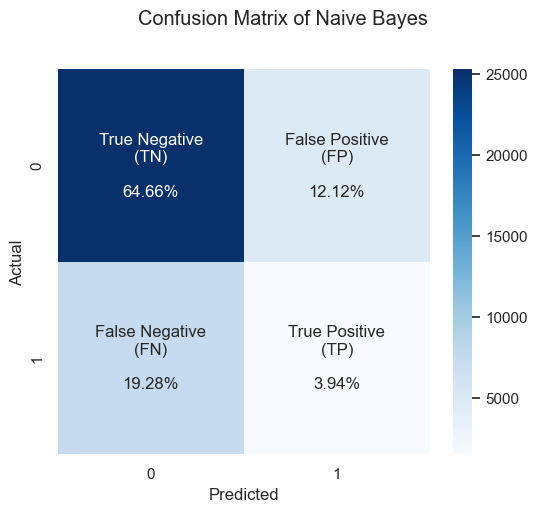

In [56]:
chart = 'Naive Bayes'

plotting_cm(cm, chart)

### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

nb_before_tuned_cv_acc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy score for untuned {chart} after a 10 fold cross validation:", \
      nb_before_tuned_cv_acc_scores)
print(f"The cross-validation ROC AUC score for untuned {chart} after a 10 fold cross validation:", \
      nb_before_tuned_cv_rocauc_scores)

The cross-validation accuracy score for untuned Naive Bayes after a 10 fold cross validation: 0.5794383687858031
The cross-validation ROC AUC score for untuned Naive Bayes after a 10 fold cross validation: 0.7213194775678056


In [58]:
print(NB_classifier.get_params())

{'priors': None, 'var_smoothing': 1e-09}


### Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

grid_nb = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1)

grid_nb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [60]:
best_hyperparams = grid_nb.best_params_
print("Best hyperparameters: \n", best_hyperparams)

nb_after_tuned_cv_acc_scores = grid_nb.best_score_

print(f"\nThe cross-validation accuracy score for tuned {chart} after a 10 fold cross validation:\n", 
      nb_after_tuned_cv_acc_scores)

best_nb_model = grid_nb.best_estimator_

Best hyperparameters: 
 {'var_smoothing': 1e-07}

The cross-validation accuracy score for tuned Naive Bayes after a 10 fold cross validation:
 0.5807119147449337


In [61]:
best_nb_fit_for_train_data_acc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_nb_fit_for_train_data_acc)
print("ROC AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_acc = cross_val_score(best_nb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_nb_fit_for_test_data_acc)
print("ROC AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.5807119147449337
ROC AUC  : 0.7191970379624791
Test Data
Accuracy : 0.7678110816231576
ROC AUC  : 0.4959020792941914


## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

# inisialisasi model dan fitting dengan data setelah sampling
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = LR_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.4797863641009915
ROC AUC Score: 0.5013093394735894
Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.46      0.58     30046
           1       0.23      0.54      0.33      9086

    accuracy                           0.48     39132
   macro avg       0.50      0.50      0.45     39132
weighted avg       0.64      0.48      0.52     39132

Confusion Matrix:

 [[13855 16191]
 [ 4166  4920]]


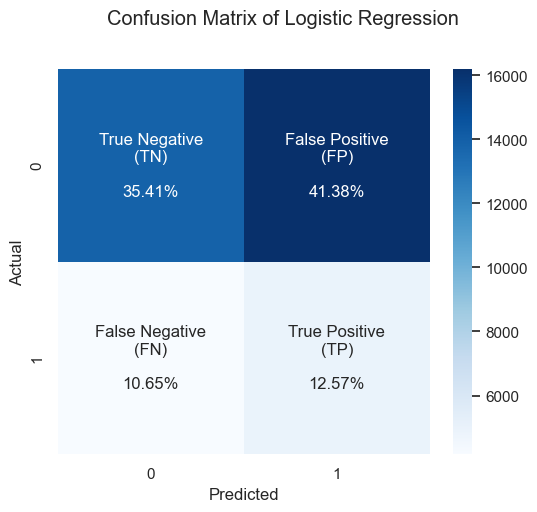

In [63]:
chart = 'Logistic Regression'

plotting_cm(cm, chart)

### Cross Validation

In [64]:
lr_before_tuned_cv_acc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
lr_before_tuned_cv_rocauc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy score for untuned {chart} after a 10 fold cross validation:", \
      lr_before_tuned_cv_acc_scores)
print(f"The cross-validation ROC AUC score for untuned {chart} after a 10 fold cross validation:", \
      lr_before_tuned_cv_rocauc_scores)

The cross-validation accuracy score for untuned Logistic Regression after a 10 fold cross validation: 0.5524550835236149
The cross-validation ROC AUC score for untuned Logistic Regression after a 10 fold cross validation: 0.5489858113995791


In [65]:
print(LR_classifier.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Hyperparameter Tuning

In [66]:
param_grid = {
    'penalty': ['l1', 'l2', '13', '14'],
    'C': [0.1, 1, 10, 20],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
#     'solver' : ['lbfgs','newton-cg'],
    'max_iter': [100, 200, 300],
    'random_state': [None, 42, 21],
    'warm_start': [True, False]
}

grid_lr = GridSearchCV(LR_classifier, param_grid, cv=kf, n_jobs=-1)

grid_lr.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', '13', '14'],
                         'random_state': [None, 42, 21],
                         'warm_start': [True, False]})

In [67]:
best_hyperparams = grid_lr.best_params_
print("Best hyperparameters: \n", best_hyperparams)

lr_after_tuned_cv_acc_scores = grid_lr.best_score_

print(f"\nThe cross-validation accuracy score for tuned {chart} after a 10 fold cross validation:\n", 
      lr_after_tuned_cv_acc_scores)

best_lr_model = grid_lr.best_estimator_

Best hyperparameters: 
 {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}

The cross-validation accuracy score for tuned Logistic Regression after a 10 fold cross validation:
 0.5524550835236149


In [68]:
best_lr_fit_for_train_data_acc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_lr_fit_for_train_data_rocauc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_lr_fit_for_train_data_acc)
print("ROC AUC  :", best_lr_fit_for_train_data_rocauc)

best_ls_fit_for_test_data_acc = cross_val_score(best_lr_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_ls_fit_for_test_data_rocauc = cross_val_score(best_lr_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_ls_fit_for_test_data_acc)
print("ROC AUC  :", best_ls_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.5524550835236149
ROC AUC  : 0.5489858113995791
Test Data
Accuracy : 0.7678110816231576
ROC AUC  : 0.49555074142127753


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# inisialisasi model dan fitting dengan data setelah sampling
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = RF_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.8808392108760094
ROC AUC Score: 0.9161833687868344
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.85      0.92     30046
           1       0.66      0.98      0.79      9086

    accuracy                           0.88     39132
   macro avg       0.83      0.92      0.85     39132
weighted avg       0.92      0.88      0.89     39132

Confusion Matrix:

 [[25545  4501]
 [  162  8924]]


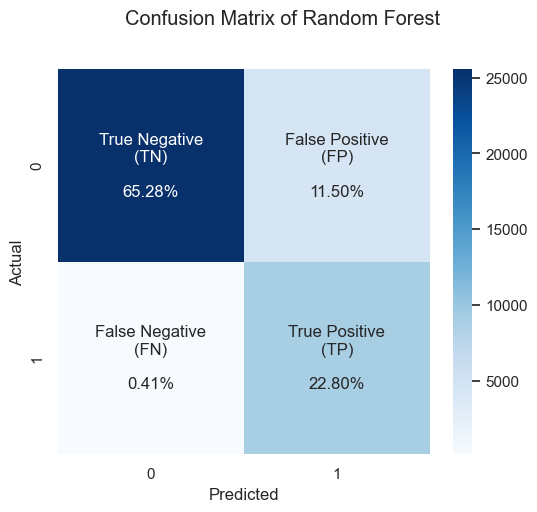

In [70]:
chart = 'Random Forest'

plotting_cm(cm, chart)

### Cross Validation

In [71]:
rf_before_tuned_cv_acc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
rf_before_tuned_cv_rocauc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy score for untuned {chart} after a 10 fold cross validation:", \
      rf_before_tuned_cv_acc_scores)
print(f"The cross-validation ROC AUC score for untuned {chart} after a 10 fold cross validation:", \
      rf_before_tuned_cv_rocauc_scores)

The cross-validation accuracy score for untuned Random Forest after a 10 fold cross validation: 0.9633708555328553
The cross-validation ROC AUC score for untuned Random Forest after a 10 fold cross validation: 0.9942526708905369


In [72]:
print(RF_classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Hyperparameter Tuning

In [73]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}

grid_rf = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1)

grid_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]})

In [74]:
best_hyperparams = grid_rf.best_params_
print("Best hyperparameters: \n", best_hyperparams)

rf_after_tuned_cv_acc_scores = grid_rf.best_score_

print(f"\nThe cross-validation accuracy score for tuned {chart} after a 10 fold cross validation:\n", 
      rf_after_tuned_cv_acc_scores)

best_rf_model = grid_rf.best_estimator_

Best hyperparameters: 
 {'bootstrap': True, 'max_depth': None, 'n_estimators': 150}

The cross-validation accuracy score for tuned Random Forest after a 10 fold cross validation:
 0.9638189965593522


In [75]:
best_rf_fit_for_train_data_acc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_rf_fit_for_train_data_rocauc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_rf_fit_for_train_data_acc)
print("ROC AUC  :", best_rf_fit_for_train_data_rocauc)

best_rf_fit_for_test_data_acc = cross_val_score(best_rf_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc = cross_val_score(best_rf_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_rf_fit_for_test_data_acc)
print("ROC AUC  :", best_rf_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9646208833518051
ROC AUC  : 0.9943176596744392
Test Data
Accuracy : 0.9509097591574329
ROC AUC  : 0.9904779060603234


## XGBoost

In [76]:
# import library model
import xgboost as xgb

# inisialisasi parameter
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# inisialisasi model dan fitting dengan data setelah sampling
XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = XGB_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9421700909741388
ROC AUC Score: 0.9593083803162248
Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.96     30046
           1       0.80      0.99      0.89      9086

    accuracy                           0.94     39132
   macro avg       0.90      0.96      0.92     39132
weighted avg       0.95      0.94      0.94     39132

Confusion Matrix:

 [[27862  2184]
 [   79  9007]]


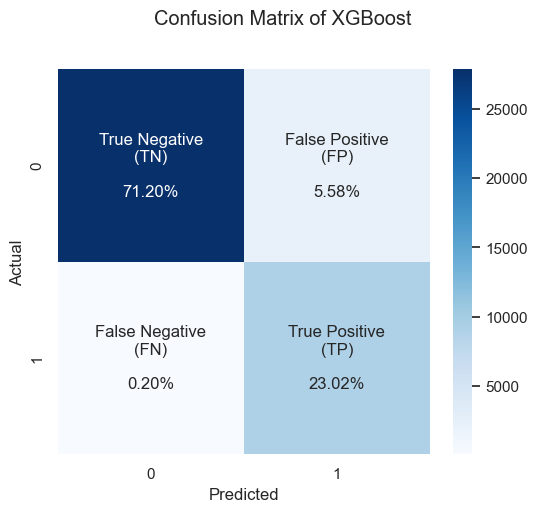

In [77]:
chart = 'XGBoost'

plotting_cm(cm, chart)

### Cross Validation

In [78]:
xg_before_tuned_cv_acc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
xg_before_tuned_cv_rocauc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy score for untuned {chart} after a 10 fold cross validation:", \
      xg_before_tuned_cv_acc_scores)
print(f"The cross-validation ROC AUC score for untuned {chart} after a 10 fold cross validation:", \
      xg_before_tuned_cv_rocauc_scores)

The cross-validation accuracy score for untuned XGBoost after a 10 fold cross validation: 0.966696421815398
The cross-validation ROC AUC score for untuned XGBoost after a 10 fold cross validation: 0.9959599272983668


In [79]:
print(XGB_classifier.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.1, 'seed': 42}


### Hyperparameter Tuning

In [80]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5],
#     'n_estimators': [100, 200, 300],
    'random_state': [42, 21, 10]
}

grid_xgb = GridSearchCV(XGB_classifier, param_grid, cv=kf, n_jobs=-1)

grid_xgb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=0, gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, ma

In [81]:
best_hyperparams = grid_xgb.best_params_
print("Best hyperparameters: \n", best_hyperparams)

xgb_after_tuned_cv_acc_scores = grid_xgb.best_score_

print(f"\nThe cross-validation accuracy score for tuned {chart} after a 10 fold cross validation:\n", 
      xgb_after_tuned_cv_acc_scores)

best_xgb_model = grid_xgb.best_estimator_

Best hyperparameters: 
 {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42}

The cross-validation accuracy score for tuned XGBoost after a 10 fold cross validation:
 0.9691493799712465


In [82]:
best_xgb_fit_for_train_data_acc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_xgb_fit_for_train_data_rocauc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_xgb_fit_for_train_data_acc)
print("ROC AUC  :", best_xgb_fit_for_train_data_rocauc)

best_xgb_fit_for_test_data_acc = cross_val_score(best_xgb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_xgb_fit_for_test_data_rocauc = cross_val_score(best_xgb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_xgb_fit_for_test_data_acc)
print("ROC AUC  :", best_xgb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9691493799712465
ROC AUC  : 0.9966580518004587
Test Data
Accuracy : 0.9561484581418984
ROC AUC  : 0.9931522434244118


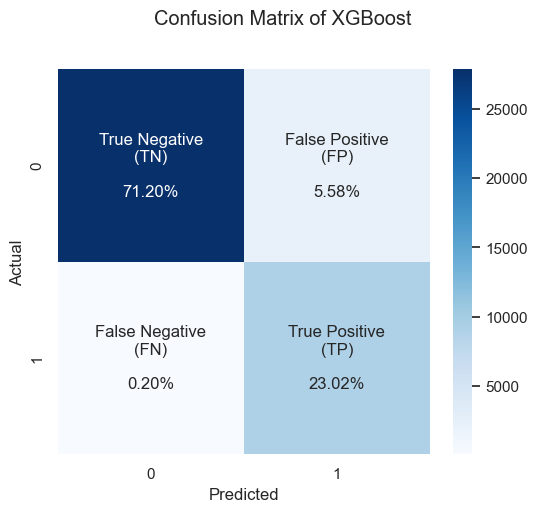

In [127]:
chart = 'XGBoost'

plotting_cm(cm, chart)

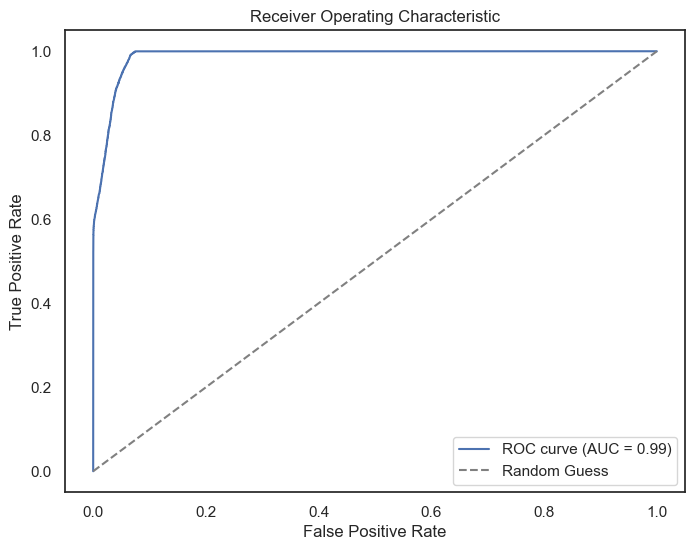

In [130]:
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the positive class
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [84]:
X = train.drop('Electric Vehicle Type', axis=1)
y = train['Electric Vehicle Type']

In [106]:
X

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude,State,Make,Clean Alternative Fuel Vehicle (CAFV) Eligibility,VIN (1-10),County,City,Model,Electric Utility
0,98908.0,2018.0,238.0,0.0,14.0,141151601.0,5.307700e+10,-120.569160,46.585140,41.0,29.0,0.0,0.000192,0.005435,0.003611,0.036737,0.007421
1,98370.0,2021.0,47.0,0.0,23.0,171566447.0,5.303509e+10,-122.646810,47.736890,41.0,11.0,0.0,0.000008,0.033303,0.003994,0.005995,0.584054
2,98199.0,2019.0,220.0,0.0,36.0,9426525.0,5.303301e+10,-122.400920,47.659080,41.0,29.0,0.0,0.001694,0.524969,0.175514,0.195738,0.185802
3,98119.0,2013.0,75.0,0.0,36.0,211807760.0,5.303301e+10,-122.368400,47.645860,41.0,23.0,0.0,0.001319,0.524969,0.175514,0.099356,0.185802
4,98516.0,2017.0,210.0,0.0,22.0,185810306.0,5.306701e+10,-122.753790,47.063160,41.0,29.0,0.0,0.000475,0.035986,0.005029,0.056723,0.584054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130435,98642.0,2022.0,0.0,0.0,18.0,216841089.0,5.301104e+10,-122.745950,45.815390,41.0,29.0,1.0,0.000038,0.059031,0.005052,0.003343,0.194856
130436,98230.0,2018.0,215.0,0.0,42.0,103521302.0,5.307301e+10,-122.748880,48.994040,41.0,23.0,1.0,0.002469,0.024709,0.002361,0.195738,0.584054
130437,98501.0,2021.0,21.0,0.0,22.0,196559310.0,5.306701e+10,-122.891660,47.039560,41.0,29.0,1.0,0.000008,0.035986,0.024072,0.002883,0.584054
130438,98335.0,2023.0,0.0,0.0,26.0,231134102.0,5.305307e+10,-122.583545,47.323449,41.0,29.0,0.0,0.002745,0.076809,0.011300,0.169258,0.194856


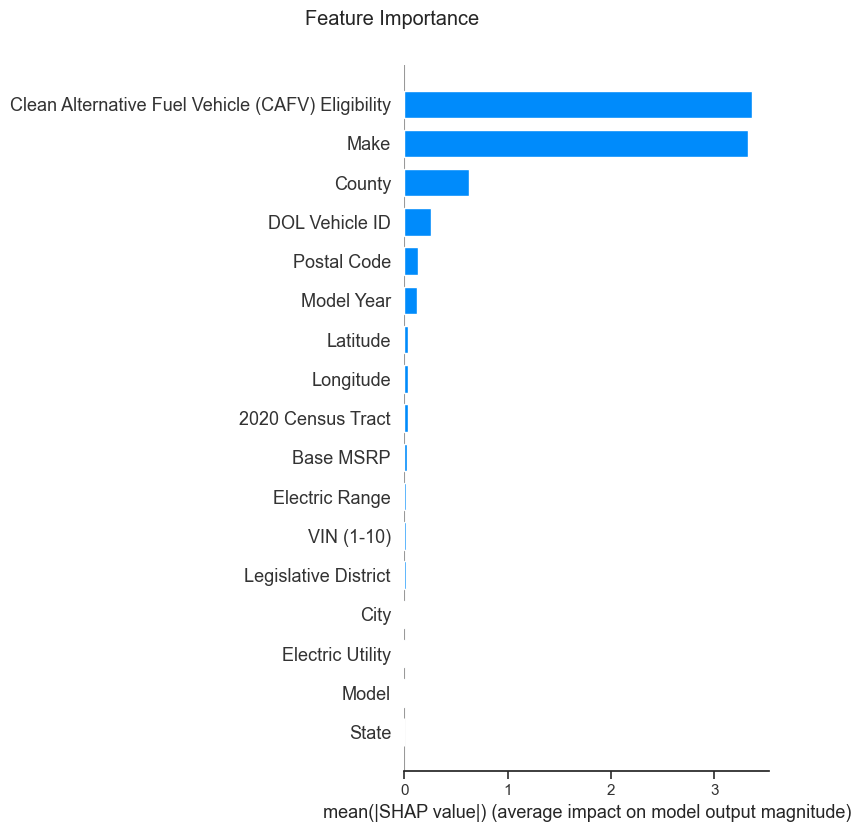

In [107]:
import shap

explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X)

feature_importances = np.abs(shap_values).mean(axis=0)

plt.suptitle('Feature Importance', y=1)

feature_importances = feature_importances.reshape(1, -1)

shap.summary_plot(feature_importances, X, plot_type='bar')
plt.show()

In [135]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(shap_values).mean(axis=0)})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances.to_csv('feature_importance.csv', index=False)
feature_importances.head()

,Feature,Importance
11,Clean Alternative Fuel Vehicle (CAFV) Eligibility,3.365547
10,Make,3.329529
13,County,0.623754
5,DOL Vehicle ID,0.258921
0,Postal Code,0.129490


# Prediction

In [131]:
# perform prediksi terhadap data train, kemudian inisialisasi sebagai dataframe
predictions = best_xgb_model.predict(train.drop('Electric Vehicle Type', axis=1))
predictions = pd.DataFrame({'Prediction': predictions})
predictions.head()

# gabung hasil prediksi dan train, buat fitur baru Actual dan Predicted
result = pd.concat([predictions, train], axis=1)
result.rename(columns = {'Electric Vehicle Type': 'Actual', 'Prediction': 'Predicted'}, inplace=True)

# # inisialisasi list fitur yang akan digunakan dalam dashboard
columns = ['Predicted', 'Actual', 'VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
          'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP',
          'Legislative District', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude']
result = result[columns]

result['Electric Vehicle Type (Actual)'] = result['Actual'].apply(lambda value: 'PHEV' if value == 1 else 'BEV')
result['Electric Vehicle Type (Predicted)'] = result['Predicted'].apply(lambda value: 'PHEV' if value == 1 else 'BEV')


for i in ['Predicted', 'Actual', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District',
         '2020 Census Tract']:
    result[i] = result[i].astype('Int64')

result.head()

,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,0.000192,0.005435,0.003611,41.0,98908,2018,29.0,0.036737,...,238,0,14,141151601.0,0.007421,53077001100,-120.56916,46.58514,BEV,BEV
1,1,1,0.000008,0.033303,0.003994,41.0,98370,2021,11.0,0.005995,...,47,0,23,171566447.0,0.584054,53035090400,-122.64681,47.73689,PHEV,PHEV
2,0,0,0.001694,0.524969,0.175514,41.0,98199,2019,29.0,0.195738,...,220,0,36,9426525.0,0.185802,53033005803,-122.40092,47.65908,BEV,BEV
3,0,0,0.001319,0.524969,0.175514,41.0,98119,2013,23.0,0.099356,...,75,0,36,211807760.0,0.185802,53033005804,-122.36840,47.64586,BEV,BEV
4,0,0,0.000475,0.035986,0.005029,41.0,98516,2017,29.0,0.056723,...,210,0,22,185810306.0,0.584054,53067012226,-122.75379,47.06316,BEV,BEV


In [132]:
result['VIN (1-10)'] = df['VIN (1-10)']
result['County'] = df['County']
result['City'] = df['City']
result['State'] = df['State']
result['Make'] = df['Make']
result['Model'] = df['Model']
result['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
result['DOL Vehicle ID'] = df['DOL Vehicle ID']
result['Electric Utility'] = df['Electric Utility']

result.head()

,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,5YJXCAE26J,Yakima,Yakima,Washington,98908,2018,TESLA,MODEL X,...,238,0,14,141151601.0,PACIFICORP,53077001100,-120.56916,46.58514,BEV,BEV
1,1,1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370,2021,HONDA,CLARITY,...,47,0,23,171566447.0,PUGET SOUND ENERGY INC,53035090400,-122.64681,47.73689,PHEV,PHEV
2,0,0,5YJ3E1EB0K,King,Seattle,Washington,98199,2019,TESLA,MODEL 3,...,220,0,36,9426525.0,CITY OF SEATTLE,53033005803,-122.40092,47.65908,BEV,BEV
3,0,0,1N4AZ0CP5D,King,Seattle,Washington,98119,2013,NISSAN,LEAF,...,75,0,36,211807760.0,CITY OF SEATTLE,53033005804,-122.36840,47.64586,BEV,BEV
4,0,0,5YJSA1E21H,Thurston,Lacey,Washington,98516,2017,TESLA,MODEL S,...,210,0,22,185810306.0,PUGET SOUND ENERGY INC,53067012226,-122.75379,47.06316,BEV,BEV


In [134]:
# result.to_csv('result_final.csv', index=False)